In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers

In [2]:
#tf.config.list_physical_devices()

In [3]:
import os

# Set which GPU to use.  This probably needs to be done before any other CUDA vars get defined.
# Use the command "nvidia-smi" to get association of a particular GPU with a particular number.
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "1,2"

In [4]:
id_dtype = np.dtype(
    [
        ("run_id", np.uint32),
        ("sub_run_id", np.uint32),
        ("event_id", np.uint32),
        ("sub_event_id", np.uint32),
    ]
)
particle_dtype = np.dtype(
    [
        ("pdg", np.uint32),
        ("energy", np.float32),
        ("position", np.float32,(3)),
        ("direction", np.float32,(2)),
        ("time", np.float32),
        ("length", np.float32)
    ]
)
weight_dtype = np.dtype(
    [
        ('PrimaryNeutrinoAzimuth',np.float32),
        ('TotalColumnDepthCGS',np.float32),
        ('MaxAzimuth',np.float32),
        ('SelectionWeight',np.float32),
        ('InIceNeutrinoEnergy',np.float32),
        ('PowerLawIndex',np.float32),
        ('TotalPrimaryWeight',np.float32),
        ('PrimaryNeutrinoZenith',np.float32),
        ('TotalWeight',np.float32),
        ('PropagationWeight',np.float32),
        ('NInIceNus',np.float32),
        ('TrueActiveLengthBefore',np.float32),
        ('TypeWeight',np.float32),
        ('PrimaryNeutrinoType',np.float32),
        ('RangeInMeter',np.float32),
        ('BjorkenY',np.float32),
        ('MinZenith',np.float32),
        ('InIceNeutrinoType',np.float32),
        ('CylinderRadius',np.float32),
        ('BjorkenX',np.float32),
        ('InteractionPositionWeight',np.float32),
        ('RangeInMWE',np.float32),
        ('InteractionColumnDepthCGS',np.float32),
        ('CylinderHeight',np.float32),
        ('MinAzimuth',np.float32),
        ('TotalXsectionCGS',np.float32),
        ('OneWeightPerType',np.float32),
        ('ImpactParam',np.float32),
        ('InteractionType',np.float32),
        ('TrueActiveLengthAfter',np.float32),
        ('MaxZenith',np.float32),
        ('InteractionXsectionCGS',np.float32),
        ('PrimaryNeutrinoEnergy',np.float32),
        ('DirectionWeight',np.float32),
        ('InjectionAreaCGS',np.float32),
        ('MinEnergyLog',np.float32),
        ('SolidAngle',np.float32),
        ('LengthInVolume',np.float32),
        ('NEvents',np.uint32),
        ('OneWeight',np.float32),
        ('MaxEnergyLog',np.float32),
        ('InteractionWeight',np.float32),
        ('EnergyLost',np.float32)
    ]
)
info_dtype = np.dtype(                                                                                                      
    [                                                                                                                           
    ("id", id_dtype),                                                                                                       
    ("image", np.float32, (300, 60)),
    ("neutrino", particle_dtype),
    ("daughter", particle_dtype),                                                                                           
    ("energies", np.float32,(10)),                                                                                          
    ("pdgs", np.float32,(10)),                                                                                              
    ("q_tot", np.float32),
    ("cog", np.float32,(3)),                                                                                                
    ("q_st", np.float32),
    ("st_pos", np.float32,(3)),                                                                                             
    ("st_num", np.float32),
    ("distance", np.float32),                                                                                               
    ("weight", weight_dtype),                                                                                                                    
    ]
)
info2_dtype = np.dtype(                                                                                                      
    [                                                                                                                           
    ("id", id_dtype),                                                                                                       
    ("image", np.float32, (300, 60,3)),
    ("neutrino", particle_dtype),
    ("daughter", particle_dtype),                                                                                           
    ("energies", np.float32,(10)),                                                                                          
    ("pdgs", np.float32,(10)),                                                                                              
    ("q_tot", np.float32),
    ("cog", np.float32,(3)),                                                                                                
    ("q_st", np.float32),
    ("st_pos", np.float32,(3)),                                                                                             
    ("st_num", np.float32),
    ("distance", np.float32),                                                                                               
    ("weight", weight_dtype),                                                                                                                    
    ]
)


keys_dtype = np.dtype(  
        [
        ("passed", np.bool_),
        ("header", np.bool_),
        ("raw_data", np.bool_),
        ("weights", np.bool_),
        ("mctree", np.bool_), 
        ("cvstats", np.bool_),
        ("pulses", np.bool_)
           ]
)
w_info_dtype = np.dtype(                                                                                                                    
        [                                                                                                                                         
        ("id", id_dtype),    
        ("neutrino", particle_dtype),
        ("energy", np.float32,(10)),
        ("pdg", np.float32,(10)),
        ("weight", weight_dtype),
        ("keys", keys_dtype)
    ]
)

In [5]:
lim = 300000
lim3 = 600000

In [6]:
dp = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_dp.npy', mode = 'w+', dtype =info_dtype, shape=(lim,1))
data = np.load('/fastio2/dasha/double_pulse/data_NuTauCC_2000.npy', mmap_mode = 'r')
dp[0:lim] = data[0:lim]

In [7]:
sp = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_sp.npy', mode = 'w+', dtype =info_dtype, shape=(lim,1))
data_ec = np.load('/fastio2/dasha/double_pulse/data_NuECC_2000.npy', mmap_mode = 'r')
#data_en = np.load('/fastio2/dasha/double_pulse/data_NuENC.npy', mmap_mode = 'r')
#data_mn = np.load('/fastio2/dasha/double_pulse/data_NuMuNC.npy', mmap_mode = 'r')
#data_tn = np.load('/fastio2/dasha/double_pulse/data_NuTauNC.npy', mmap_mode = 'r')

sp[0:lim] = data_ec[0:lim]

In [8]:
#data_t = np.load('/fastio2/dasha/double_pulse/data_track.npy', mmap_mode = 'r')
data_s = np.load('/fastio2/dasha/double_pulse/data_sp.npy', mmap_mode = 'r')
data_d = np.load('/fastio2/dasha/double_pulse/data_dp.npy', mmap_mode = 'r')


In [9]:
#print(np.max(data_t['image'][0]), data_t['neutrino']['energy'][0])
print(np.max(data_s['image'][0]), data_s['neutrino']['energy'][0])
print(np.max(data_d['image'][0]), data_d['neutrino']['energy'][0])

0.006064835 [963011.94]
0.4535335 [380103.2]


In [10]:
net = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_Network.npy', mode = 'w+', dtype =info_dtype, shape=(lim3,1))
net[0:lim] = data_d[0:lim]
net[lim:2*lim] = data_s[0:lim]
#net[2*lim:lim3] = data_d[0:lim]


In [11]:
data_all = np.load('/fastio2/dasha/double_pulse/data_Network.npy', mmap_mode='r') #T,S,D
print(np.max(data_all['image'][0]), data_all['neutrino']['energy'][0], data_all.shape)

0.4535335 [380103.2] (600000, 1)


In [12]:
label_d = [[0,1]]*lim
label_s = [[1,0]]*lim

label_d = np.array(label_d)
label_s = np.array(label_s)
#label_t = np.array(label_t)
label_all = np.concatenate((label_s, label_d), axis = 0) 

print(label_all.shape, label_d.shape,label_s.shape)
print(label_all[0], label_d[0],label_s[0])

(600000, 2) (300000, 2) (300000, 2)
[1 0] [0 1] [1 0]


0.4535335 [380103.2]
0.05271135 [50493.516]
0.11978082 [129938.57]
0.014943575 [84604.63]
0.10766723 [134935.27]
0.45686698 [1438098.9]
0.03830274 [470727.38]
0.49514624 [37907.457]
0.32791469 [189289.75]
0.045537762 [79580.3]


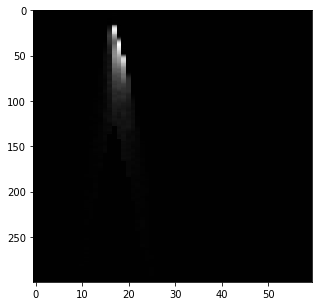

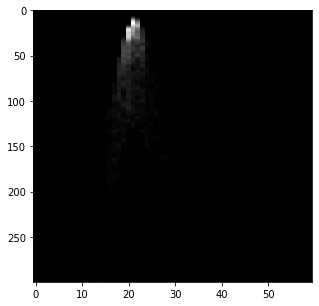

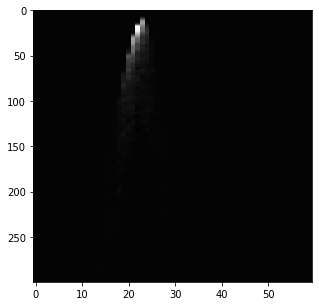

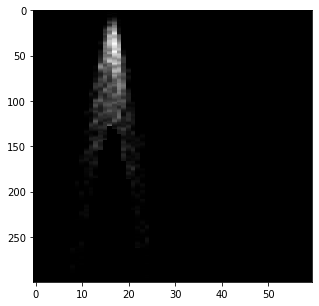

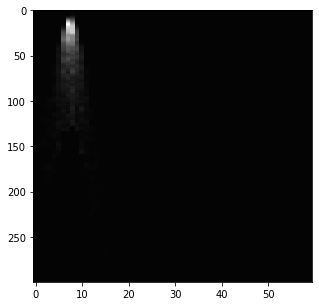

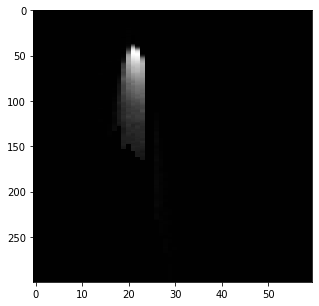

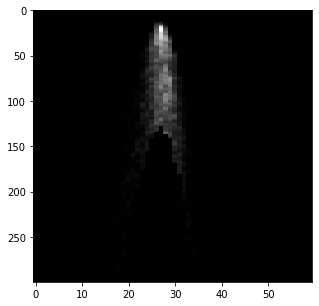

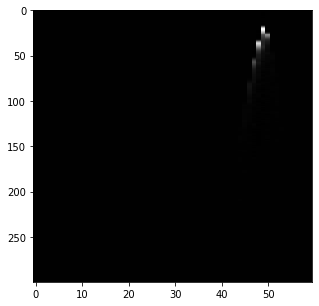

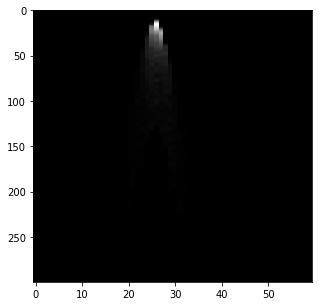

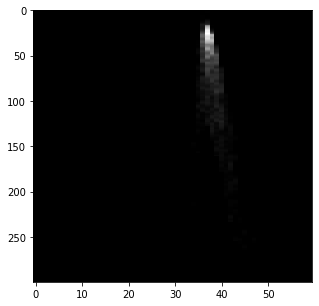

In [13]:
for i, im in enumerate(data_all['image'][:10]):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.imshow(im.reshape(300,60), interpolation='nearest', aspect='auto', cmap= 'gray')
    print(np.max(im), data_all['neutrino']['energy'][i])

In [14]:
idx = np.arange(data_all.shape[0])
np.random.shuffle(idx)
print(idx[:10])

[392766 203124 149925 247899 265128  53229 166853   8015 238066  66496]


In [15]:
pos = 0
label = []
mix = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_Network_mixed.npy', mode = 'w+', dtype =info_dtype, shape=(lim3,1))
for i in idx:
    mix[pos:pos+1] = data_all[i]
    label.append(label_all[i])
    pos = pos + 1
label = np.array(label)

In [16]:
data_mix = np.load('/fastio2/dasha/double_pulse/data_Network_mixed.npy', mmap_mode='r') #T,S,D

0.046022464 [62907.574]
0.08904552 [22325.455]
0.2115545 [208820.97]
0.040030636 [17999.143]
0.39847767 [30751.326]
0.48073062 [1931974.1]
0.36649722 [70178.06]
0.06946217 [79045.2]
0.033735353 [161674.55]
0.058172762 [273640.62]


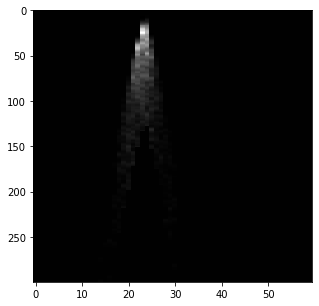

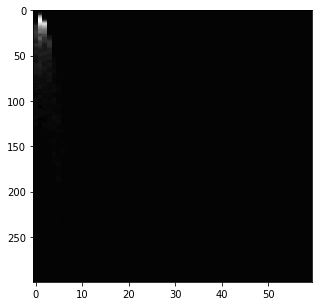

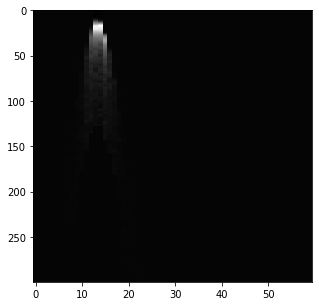

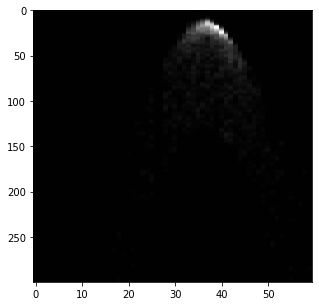

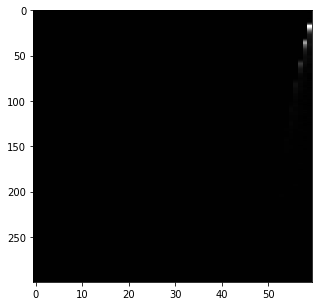

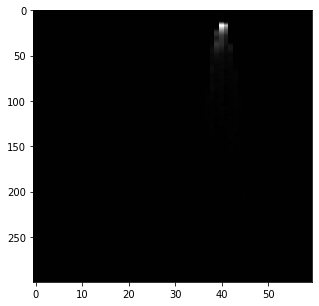

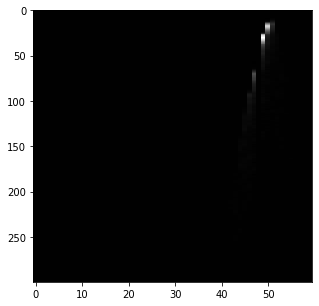

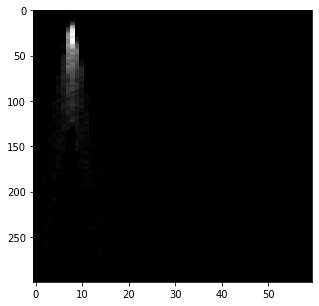

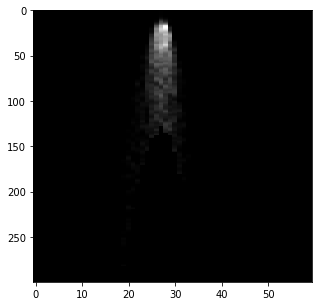

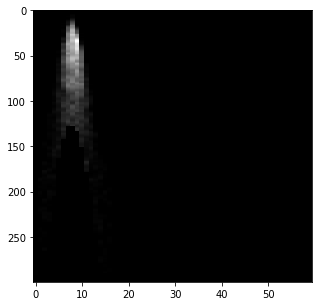

In [17]:
for i, im in enumerate(data_mix['image'][:10]):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.imshow(im.reshape(300,60), interpolation='nearest', aspect='auto', cmap= 'gray')
    print(np.max(im), data_mix['neutrino']['energy'][i])

In [18]:
print(data_mix.shape)#,label.shape)

(600000, 1)


In [19]:
train = np.zeros(lim3, bool)
test = np.zeros(lim3, bool)
valid = np.zeros(lim3, bool)

train[:140000] = 1 
test[140000:170000] = 1 
valid[170000:] = 1

In [20]:
print(valid)
print(valid.shape)
print(np.squeeze(data_mix).shape)
print(data_mix[valid].shape)
print(data_mix['image'].reshape(len(data_mix['image']),300,60,1).shape)
print(data_mix['image'][valid].reshape(len(data_mix['image'][valid]),300,60,1).shape)


[False False False ...  True  True  True]
(600000,)
(600000,)
(430000, 1)
(600000, 300, 60, 1)
(430000, 300, 60, 1)


In [21]:
mean = np.mean(data_mix['image'][train])
std = np.std(data_mix['image'][train])
print(mean,std)

0.0016132531 0.016890975


In [ ]:
pos = 0
div = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_Network_mixed_div.npy', mode = 'w+', dtype =info2_dtype, shape=(lim3,1))
for i in data_mix:
    im = i['image']-mean
    im = im/std
    div[pos] = i 
    #print(im.shape)
    image = tf.convert_to_tensor(im.reshape(300,60,1))
    #print(image.shape)
    div['image'][pos][0] = tf.image.grayscale_to_rgb(image)
    #print(div['image'][pos].shape)
    pos = pos + 1

In [ ]:
data_div = np.load('/fastio2/dasha/double_pulse/data_Network_mixed_div.npy', mmap_mode='r') #T,S,D

In [ ]:
for i, im in enumerate(data_div['image'][:3]):
    print(np.max(im), np.max(data_mix['image'][i]))
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.imshow(im[0], interpolation='nearest', aspect='auto')
   # print(im[0])
   #print(data_div['neutrino'][i])
   # print(data_div['image'][i][0].shape)

In [ ]:
print(data_div[valid]['image'].shape)

In [ ]:
VGG = VGG16(include_top=False, input_shape=(300,60,3))
#for layer in VGG.layers:
#    layer.trainable =False

In [ ]:
#for layer in VGG16:
#    model.add(layer)
with tf.device('/cpu:0'):
    model = tf.keras.Sequential()
    model.add(VGG)
    model.add(layers.Flatten())
    model.add(layers.Dense(2, activation='softmax'))
    model.summary()

In [ ]:
from tensorflow.keras.utils import multi_gpu_model
from tensorflow.keras import optimizers
parallel_model = multi_gpu_model(model,gpus=2)
sgd = optimizers.SGD(lr=0.001, momentum =0.9)
parallel_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [29]:
#from tensorflow.python.client import device_lib
#device_lib.list_local_devices()

In [30]:
history = parallel_model.fit(data_div[train]['image'].reshape(data_div[train]['image'].shape[0],300,60,3), label[train], epochs=100, validation_data=(data_div[valid]['image'].reshape(data_div[valid]['image'].shape[0],300,60,3), label[valid]), batch_size = 512)

Train on 140000 samples, validate on 30000 samples
Epoch 1/20
140000/140000 [==============================] - 502s 4ms/sample - loss: 0.6524 - accuracy: 0.6126 - val_loss: 0.6426 - val_accuracy: 0.6212
Epoch 2/20
140000/140000 [==============================] - 384s 3ms/sample - loss: 0.6223 - accuracy: 0.6461 - val_loss: 0.6183 - val_accuracy: 0.6488
Epoch 3/20
140000/140000 [==============================] - 380s 3ms/sample - loss: 0.6122 - accuracy: 0.6551 - val_loss: 0.6241 - val_accuracy: 0.6446
Epoch 4/20
140000/140000 [==============================] - 384s 3ms/sample - loss: 0.6011 - accuracy: 0.6642 - val_loss: 0.6042 - val_accuracy: 0.6577
Epoch 5/20
140000/140000 [==============================] - 385s 3ms/sample - loss: 0.5966 - accuracy: 0.6664 - val_loss: 0.6098 - val_accuracy: 0.6553
Epoch 6/20
140000/140000 [==============================] - 386s 3ms/sample - loss: 0.5937 - accuracy: 0.6691 - val_loss: 0.6018 - val_accuracy: 0.6585
Epoch 7/20
140000/140000 [===========

In [33]:
import json
history_dict = history.history # Get the dictionary containing each metric and the loss for each epoch
#json.dumps(history_dict, open('/data/dfc13/DoublePulse/Models/TransferTraining.json', 'w')) # Save it under the form of a json file
#
model.save('/data/dfc13/DoublePulse/Models/TransferTraining.h5') # Save the model
#
ResultsFile = open('/data/dfc13/DoublePulse/Models/TransferTraining.txt','w') # File for saving the results of the fit.

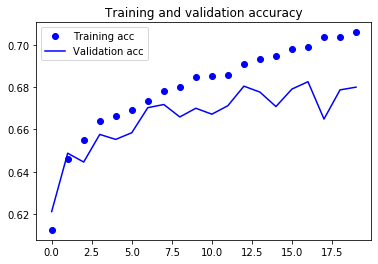

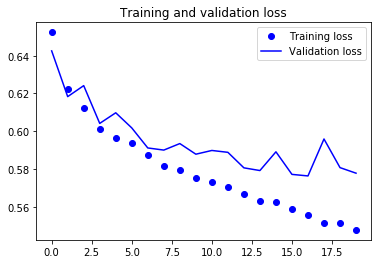

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
result = parallel_model.evaluate(data_div['image'][test].reshape(len(data_div['image'][test]),300,60,3),label[test])
print(result)

30000/30000 [==============================] - 38s 1ms/sample - loss: 0.5763 - accuracy: 0.6812
[0.5763461131731669, 0.68123335]


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
test_pred = parallel_model.predict(data_div['image'][test].reshape(len(data_div['image'][test]),300,60,3))
matrix = confusion_matrix(label[test].argmax(axis=1), test_pred.argmax(axis=1))
report = classification_report(label[test].argmax(axis=1), test_pred.argmax(axis=1))

In [38]:
#print("True Positive",tp)
#print("True Negative",tn)
#print("False Positive",fp)
#print("False Negative",fn)

#ResultsFile.write(repr(matrix))
#ResultsFile.write('\n')
#ResultsFile.write(report)
#ResultsFile.close()

print(matrix)
print(report)

[[10278  4745]
 [ 4818 10159]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68     15023
           1       0.68      0.68      0.68     14977

    accuracy                           0.68     30000
   macro avg       0.68      0.68      0.68     30000
weighted avg       0.68      0.68      0.68     30000

